# **Computational Drug Discovery [Part 4] Regression Models with Random Forest**

## **1. Import libraries**

In [52]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [53]:
df = pd.read_csv('enoyl_acyl_carrier_protein_reductase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

df.shape

(340, 882)

## **3. Input features**
The ***Enoyl_Acyl_Carrier_Protein_Reductase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [54]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
336,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
337,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
338,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [55]:
Y = df.pIC50
Y

0      4.972243
1      4.000000
2      4.000000
3      4.000000
4      4.000000
         ...   
335    4.806875
336    7.522879
337    6.397940
338    8.346787
339    5.327902
Name: pIC50, Length: 340, dtype: float64

### **3.3. Let's examine the data dimension**

In [56]:
X.shape

(340, 881)

In [57]:
Y.shape

(340,)

### **3.4. Remove low variance features**

In [58]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [59]:
X.shape

(340, 144)

In [60]:
import numpy as np
np.savetxt('descriptor_list.csv', X, delimiter=',')

## **4. Data split (80/20 ratio)**

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [62]:
X_train.shape, Y_train.shape

((272, 144), (272,))

In [63]:
X_test.shape, Y_test.shape

((68, 144), (68,))

## **5. Building a Regression Model using Random Forest**

In [64]:
import numpy as np
np.random.seed(42)
model = RandomForestRegressor(n_estimators=2000, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.49099139887107857

In [65]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

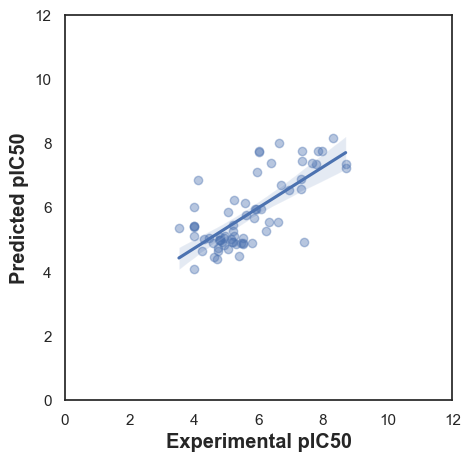

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Save Model as Pickle Object

In [67]:
import pickle

In [68]:
pickle.dump(model, open('enoyl_acyl_carrier_protein_reductase_model.pkl', 'wb'))